# PDF and CDF


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import norm

In [4]:
x = np.linspace(-6, 6, 1000)

In [5]:
fx = norm.pdf(x, loc=0, scale=1)

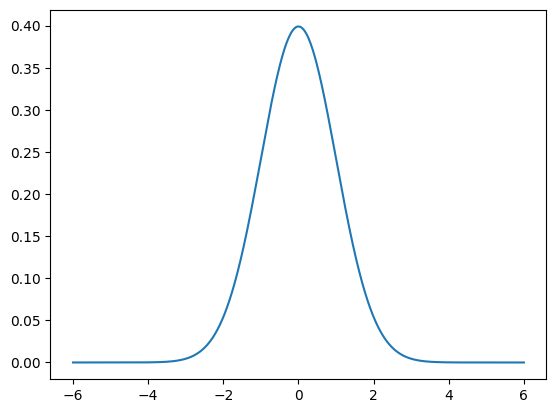

In [7]:
plt.plot(x, fx);

In [8]:
Fx = norm.cdf(x, loc=0, scale=1)

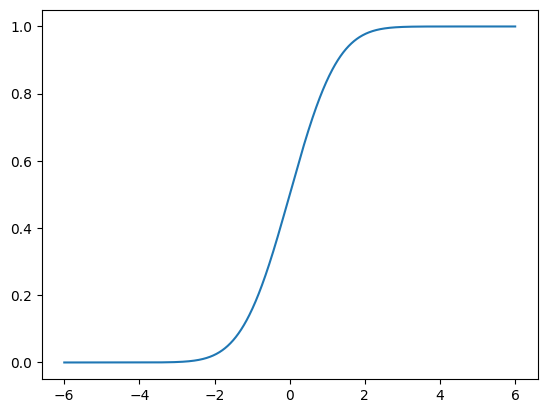

In [10]:
plt.plot(x, Fx);

In [11]:
logfx = norm.logpdf(x, loc=0, scale=1)

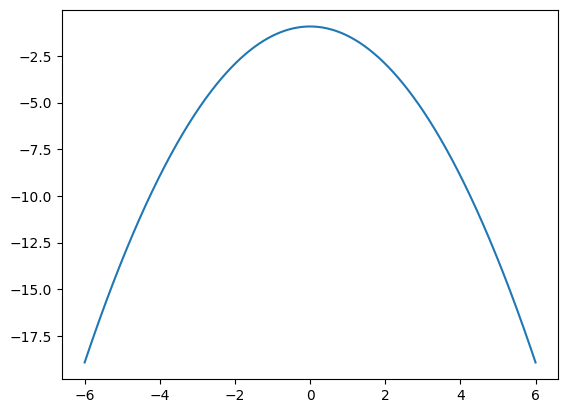

In [12]:
plt.plot(x, logfx);

# Convolution

In [13]:
from PIL import Image

In [15]:
!wget http://fokakefir.go.ro/lemon_app/images/post_8ca7e6aa-7440-4a10-9dd0-f932e8606cd0.jpg
!mv post_8ca7e6aa-7440-4a10-9dd0-f932e8606cd0.jpg image.jpg

--2023-06-30 14:38:39--  http://fokakefir.go.ro/lemon_app/images/post_8ca7e6aa-7440-4a10-9dd0-f932e8606cd0.jpg
Resolving fokakefir.go.ro (fokakefir.go.ro)... 86.125.187.99
Connecting to fokakefir.go.ro (fokakefir.go.ro)|86.125.187.99|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200414 (196K) [image/jpeg]
Saving to: ‘post_8ca7e6aa-7440-4a10-9dd0-f932e8606cd0.jpg.1’

post_8ca7e6aa-7440- 100%[===================>] 195.72K  1.14MB/s    in 0.2s    

2023-06-30 14:38:40 (1.14 MB/s) - ‘post_8ca7e6aa-7440-4a10-9dd0-f932e8606cd0.jpg.1’ saved [200414/200414]



In [17]:
img = Image.open("image.jpg")

In [18]:
gray = np.mean(img, axis=2)

In [19]:
x = np.linspace(-6, 6, 50)

In [20]:
fx = norm.pdf(x, loc=0, scale=1)

In [21]:
filt = np.outer(fx, fx)

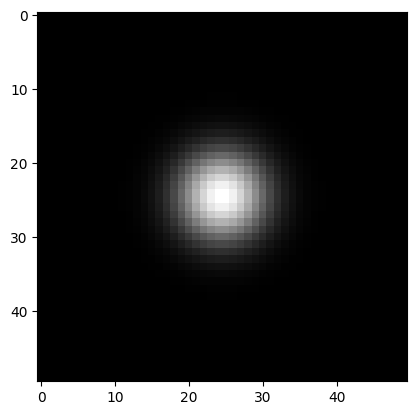

In [23]:
plt.imshow(filt, cmap='gray');

In [24]:
from scipy.signal import convolve2d

In [25]:
out = convolve2d(gray, filt)

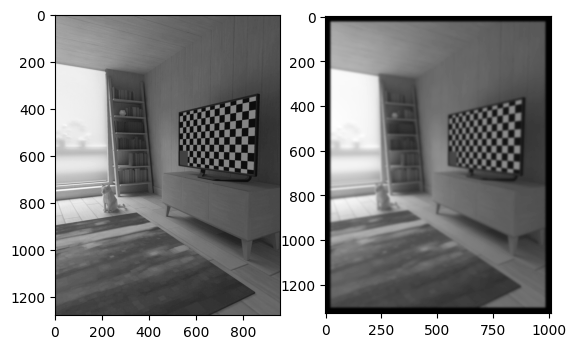

In [27]:
plt.subplot(1, 2, 1)
plt.imshow(gray, cmap='gray')
plt.subplot(1, 2, 2)
plt.imshow(out, cmap='gray');

# Exercise

In [28]:
!wget https://github.com/lazyprogrammer/machine_learning_examples/raw/master/cnn_class/lena.png

--2023-06-30 14:47:54--  https://github.com/lazyprogrammer/machine_learning_examples/raw/master/cnn_class/lena.png
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/cnn_class/lena.png [following]
--2023-06-30 14:47:54--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/cnn_class/lena.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘lena.png’

lena.png            100%[===================>] 462.73K  --.-KB/s    in 0.02s   

2023-06-30 14:47:55 (20.3 MB/s) - ‘lena.png’ saved [4738

In [29]:
img = Image.open('lena.png')

In [30]:
gray = np.mean(img, axis=2)

In [33]:
hx_filter = np.array([[1, 0, -1], [2, 0, -2], [1, 0, -1]])
hx_filter

array([[ 1,  0, -1],
       [ 2,  0, -2],
       [ 1,  0, -1]])

In [38]:
hy_filter = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
hy_filter

array([[ 1,  2,  1],
       [ 0,  0,  0],
       [-1, -2, -1]])

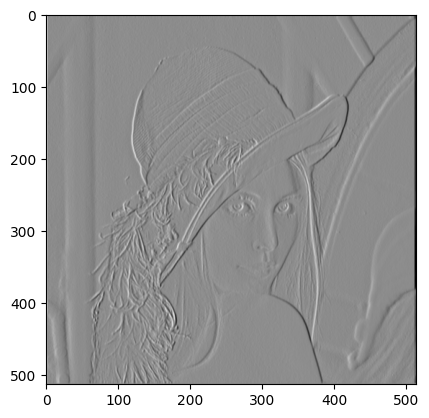

In [35]:
gx = convolve2d(gray, hx_filter)
plt.imshow(gx, cmap='gray');

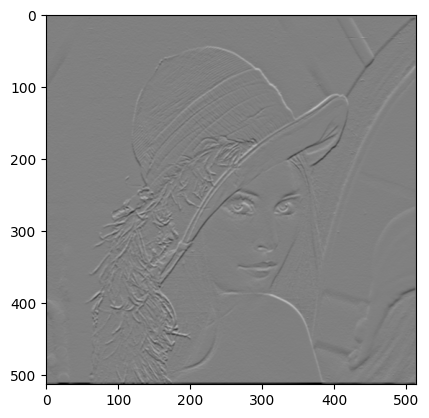

In [39]:
gy = convolve2d(gray, hy_filter)
plt.imshow(gy, cmap='gray');

In [40]:
res = np.sqrt(gx * gx + gy * gy)

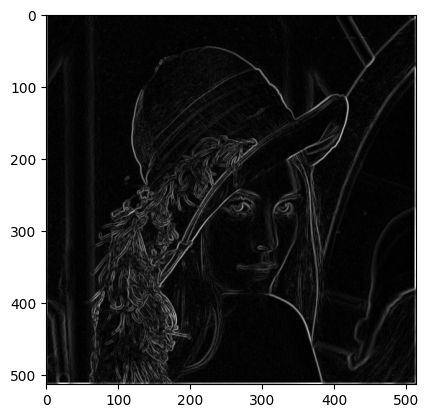

In [42]:
plt.imshow(res, cmap='gray');